## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import plot_confusion_matrix, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

decision tree, random forrest

## Importing Data

In [2]:
all_data = pd.read_csv('../../../data/chocolate.csv')
all_data

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


## Data Cleaning

### Replacing column spaces with underscores and lower casing column names for simplicity when calling them. 

In [3]:
all_data.columns = all_data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()

all_data = all_data.replace("%", "", regex=True)
all_data

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [4]:
df =  all_data.copy()

In [5]:
df.country_of_bean_origin.value_counts()

Venezuela              246
Peru                   223
Ecuador                216
Dominican Republic     211
Madagascar             168
                      ... 
Sulawesi                 1
Principe                 1
DR Congo                 1
Sumatra                  1
Sao Tome & Principe      1
Name: country_of_bean_origin, Length: 61, dtype: int64

In [6]:
# retreiving rows from the third index and on - leaving out rows with empty values
df['ingredient_list'] = [np.nan if l is np.nan else l[3:] for l in df['ingredients']]

In [7]:
df['ingredient_list'].value_counts()

B,S,C          903
B,S            661
B,S,C,L        273
B,S,C,V,L      184
B,S,C,V        139
B,S*            31
B,S*,C,Sa       20
B,S*,C          12
B,S,L            8
B,S*,C,V         7
,S,C,V,Sa        6
B,S,C,Sa         5
B,S,V,L          5
B                5
,S,C,V,L,Sa      4
B,S*,V,L         3
B,S,V            3
B,S*,C,L         2
B,S*,Sa          1
B,C              1
B,S,C,L,Sa       1
Name: ingredient_list, dtype: int64

In [8]:
# leaving out occurances below 8 

most_common = (df['ingredient_list'].value_counts()).iloc[:9].index


df = df[df['ingredient_list'].isin(most_common)]

In [9]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,ingredient_list
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,"3- B,S,C","cocoa, blackberry, full body",3.75,"B,S,C"
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,"3- B,S,C","cocoa, vegetal, savory",3.50,"B,S,C"
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,"3- B,S,C","rich cocoa, fatty, bready",3.25,"B,S,C"
3,797,A. Morin,France,2012,Peru,Peru,63,"4- B,S,C,L","fruity, melon, roasty",3.75,"B,S,C,L"
4,797,A. Morin,France,2012,Bolivia,Bolivia,70,"4- B,S,C,L","vegetal, nutty",3.50,"B,S,C,L"
...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,"B,S*,C,Sa"
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75,"3- B,S,C","strong nutty, marshmallow",3.75,"B,S,C"
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72,"3- B,S,C","muted, roasty, accessible",3.50,"B,S,C"
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,"B,S,C"


# Exploratory Data Analysis

### Determining the relationships of ingredients and cocoa percentage with chocolate rating

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2231 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2231 non-null   int64  
 1   company_manufacturer              2231 non-null   object 
 2   company_location                  2231 non-null   object 
 3   review_date                       2231 non-null   int64  
 4   country_of_bean_origin            2231 non-null   object 
 5   specific_bean_origin_or_bar_name  2231 non-null   object 
 6   cocoa_percent                     2231 non-null   object 
 7   ingredients                       2231 non-null   object 
 8   most_memorable_characteristics    2231 non-null   object 
 9   rating                            2231 non-null   float64
 10  ingredient_list                   2231 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 209.2+ KB


In [11]:
df.cocoa_percent=df.cocoa_percent.astype(float)

In [12]:
df.groupby(['cocoa_percent', 'rating']).mean()

ref  review_date
cocoa_percent rating                          
46.0          2.75     552.000000  2010.000000
50.0          3.75     572.000000  2010.000000
53.0          2.00      32.000000  2006.000000
55.0          2.50     823.000000  2011.666667
              2.75     726.666667  2011.166667
...                           ...          ...
90.0          3.75    1117.000000  2013.000000
91.0          1.50     259.000000  2008.000000
              2.00     188.000000  2007.000000
              3.00     387.000000  2009.000000
99.0          2.00      81.000000  2006.000000

[216 rows x 2 columns]

In [13]:
print('Ingredient_list')
print(*list(df.ingredient_list.unique()))

Ingredient_list
B,S,C B,S,C,L B,S B,S,C,V B,S,C,V,L B,S* B,S*,C B,S,L B,S*,C,Sa


In [14]:
mean_ingredient_list = df.groupby('ingredient_list').mean()['rating']
mean_ingredient_list


ingredient_list
B,S          3.220272
B,S*         2.959677
B,S*,C       2.937500
B,S*,C,Sa    3.112500
B,S,C        3.276024
B,S,C,L      3.203297
B,S,C,V      2.967626
B,S,C,V,L    3.089674
B,S,L        2.687500
Name: rating, dtype: float64

In [15]:
mean_ingredient_list

ingredient_list
B,S          3.220272
B,S*         2.959677
B,S*,C       2.937500
B,S*,C,Sa    3.112500
B,S,C        3.276024
B,S,C,L      3.203297
B,S,C,V      2.967626
B,S,C,V,L    3.089674
B,S,L        2.687500
Name: rating, dtype: float64

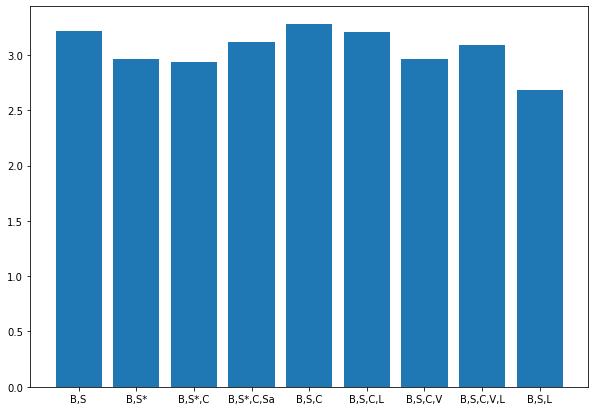

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

x = mean_ingredient_list.index
 
y = mean_ingredient_list.values
 

fig = plt.figure(figsize =(10, 7))
 

plt.bar(x, y)
 

plt.show()

**this graph is showing the mean rating for every list combination of ingredients in our  dataframe.**

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


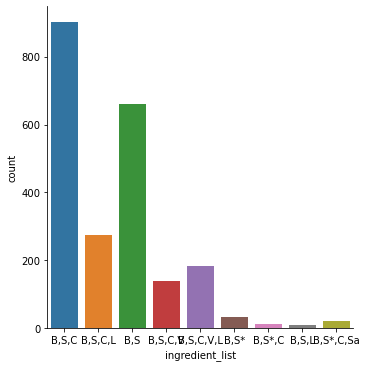

In [17]:
sns.factorplot('ingredient_list', data=df, kind='count')

**this is graph is showing how many of  each ingredient list there are in the dataframe. It also shows that the ingredient list,  B,S,C has the highest  value count.**


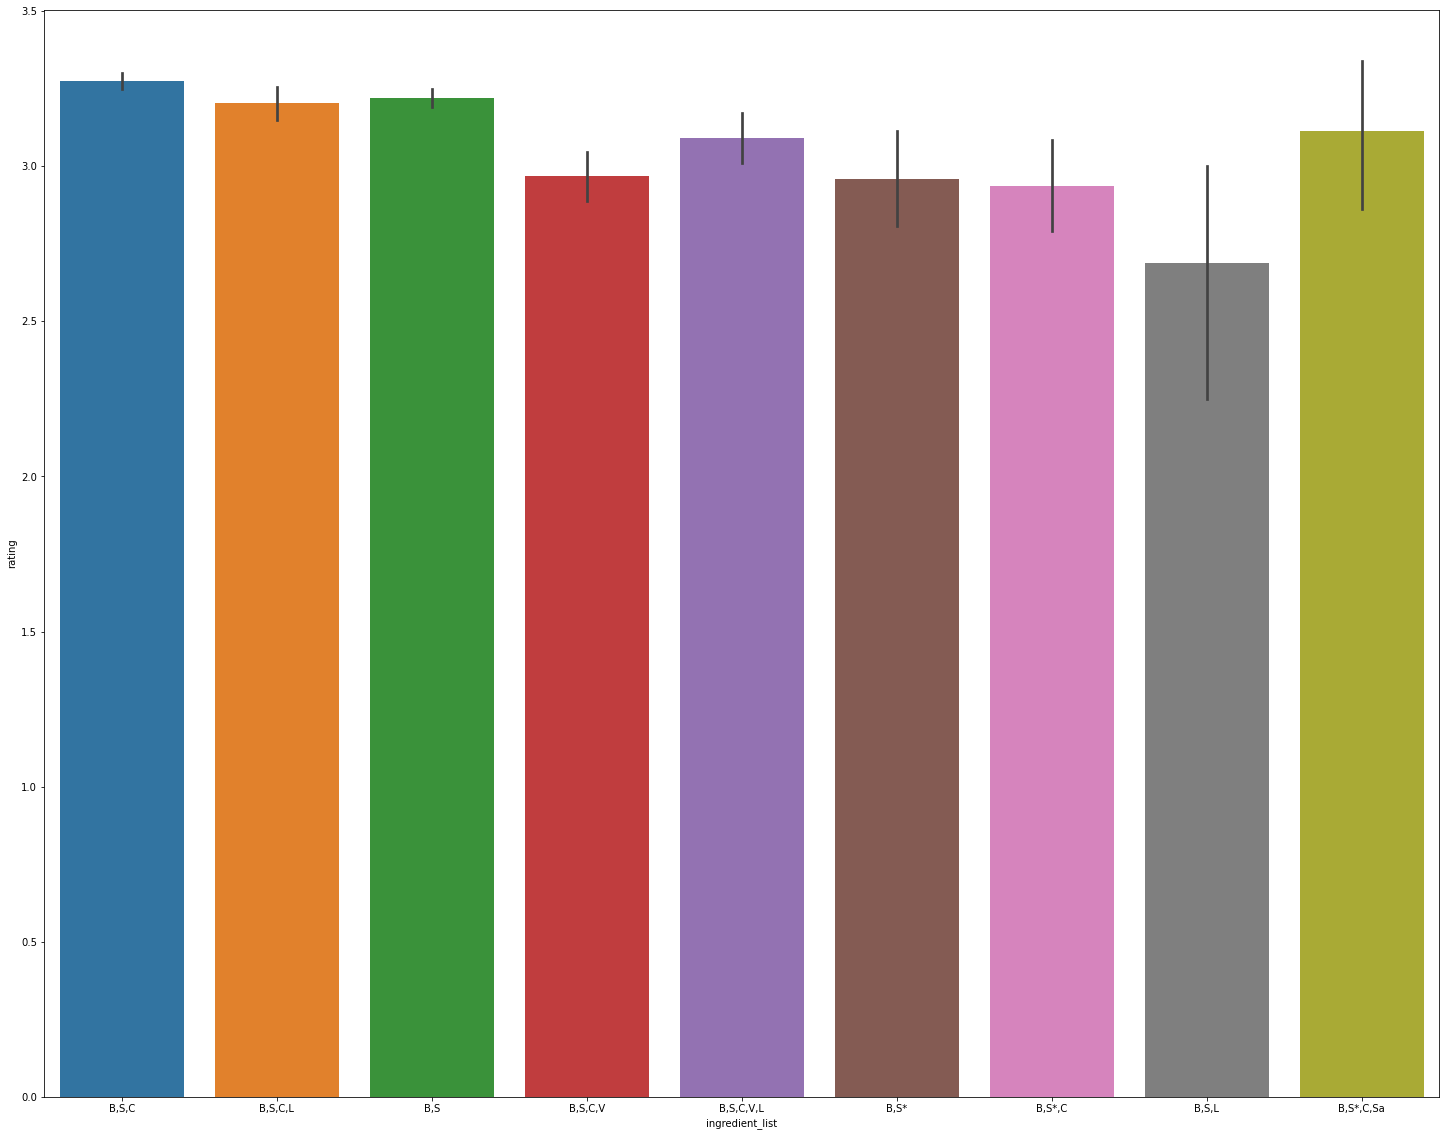

In [18]:
plt.figure (figsize= (25,20))
sns.barplot(x=df.ingredient_list, y=df.rating)

**This graph  is showing that the  list B,S,C has  the  highest average rating. It seems that as there  are  more ingredients in the chocolate, the rating goes down a little. It does not seem like we will need to bin this features seeing as the ingredient list is pretty much already binned. Each combination is its  own bin. The graph shows that B,S,L has the lowest rating.**

In [19]:
#df.cocoa_percent.value_counts()

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


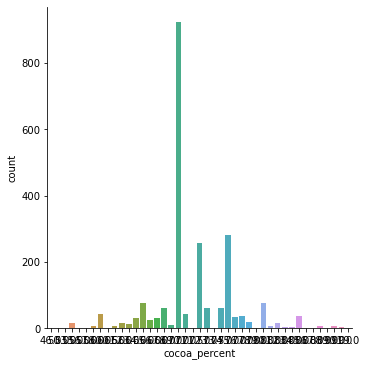

In [20]:

sns.factorplot('cocoa_percent', data=df, kind='count')

**this graph shows how  many of each cocoa percent there are**

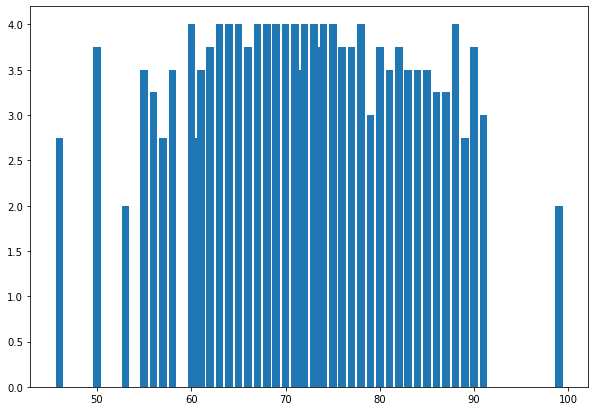

In [21]:
cocoa_percent = (df['cocoa_percent'] )
rating = df['rating']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(cocoa_percent, rating)
 
# Show Plot
plt.show()

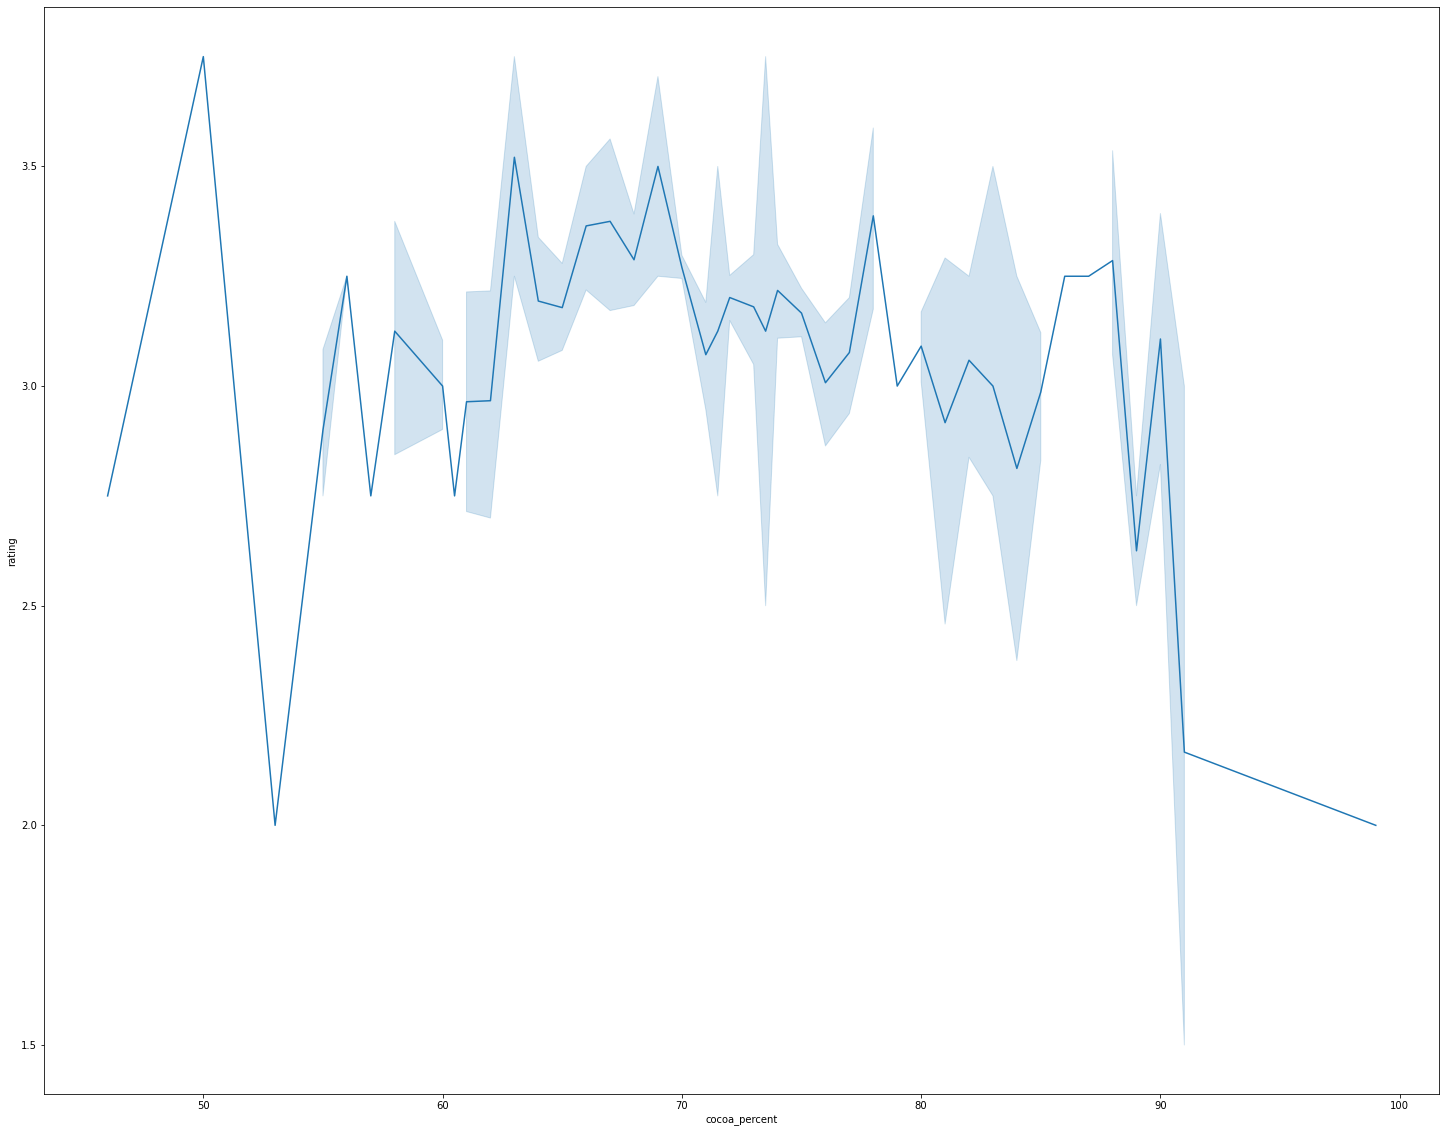

In [22]:
plt.figure (figsize= (25,20))
sns.lineplot(data=df, x=df.cocoa_percent, y=df.rating)

**This line plot between cocoa_percent and rating displays that the chocolate with the highest rating has 50% of cocoa. It seems as though the middle percent of cocoa_percent has a higher rating and the higher the cocoa_percent is the worse the rating is.**

###  creating a  new column called  rating class, where 0 would be in the row  if the rating is less than three and where 1 would be  in  the row if the rating is greater than 3.

In [23]:

df['rating_class'] = [1 if r >= 3 else 0 for r in df['rating']]

In [24]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,ingredient_list,rating_class
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,"B,S,C",1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,"B,S,C",1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,"B,S,C",1
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,"B,S,C,L",1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,"B,S,C,L",1
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,"B,S*,C,Sa",0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,"B,S,C",1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50,"B,S,C",1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,"B,S,C",1


In [25]:
class_pcts = df['rating_class'].value_counts(normalize=True).to_dict()
class_pcts

{1: 0.7794710891976692, 0: 0.22052891080233078}

In [26]:
groups = df.groupby('rating_class').mean()['cocoa_percent'].to_dict()
groups

{0: 71.88922764227642, 1: 71.26451983898792}

In [27]:
df['rating_class'].value_counts()


1    1739
0     492
Name: rating_class, dtype: int64

In [28]:
weighted_avgs = {}
for i in list(range(2)):
    weighted_avgs[i] = class_pcts[i] * groups[i]

In [29]:
weighted_avgs

{0: 15.85365307037203, 1: 55.54863290004482}

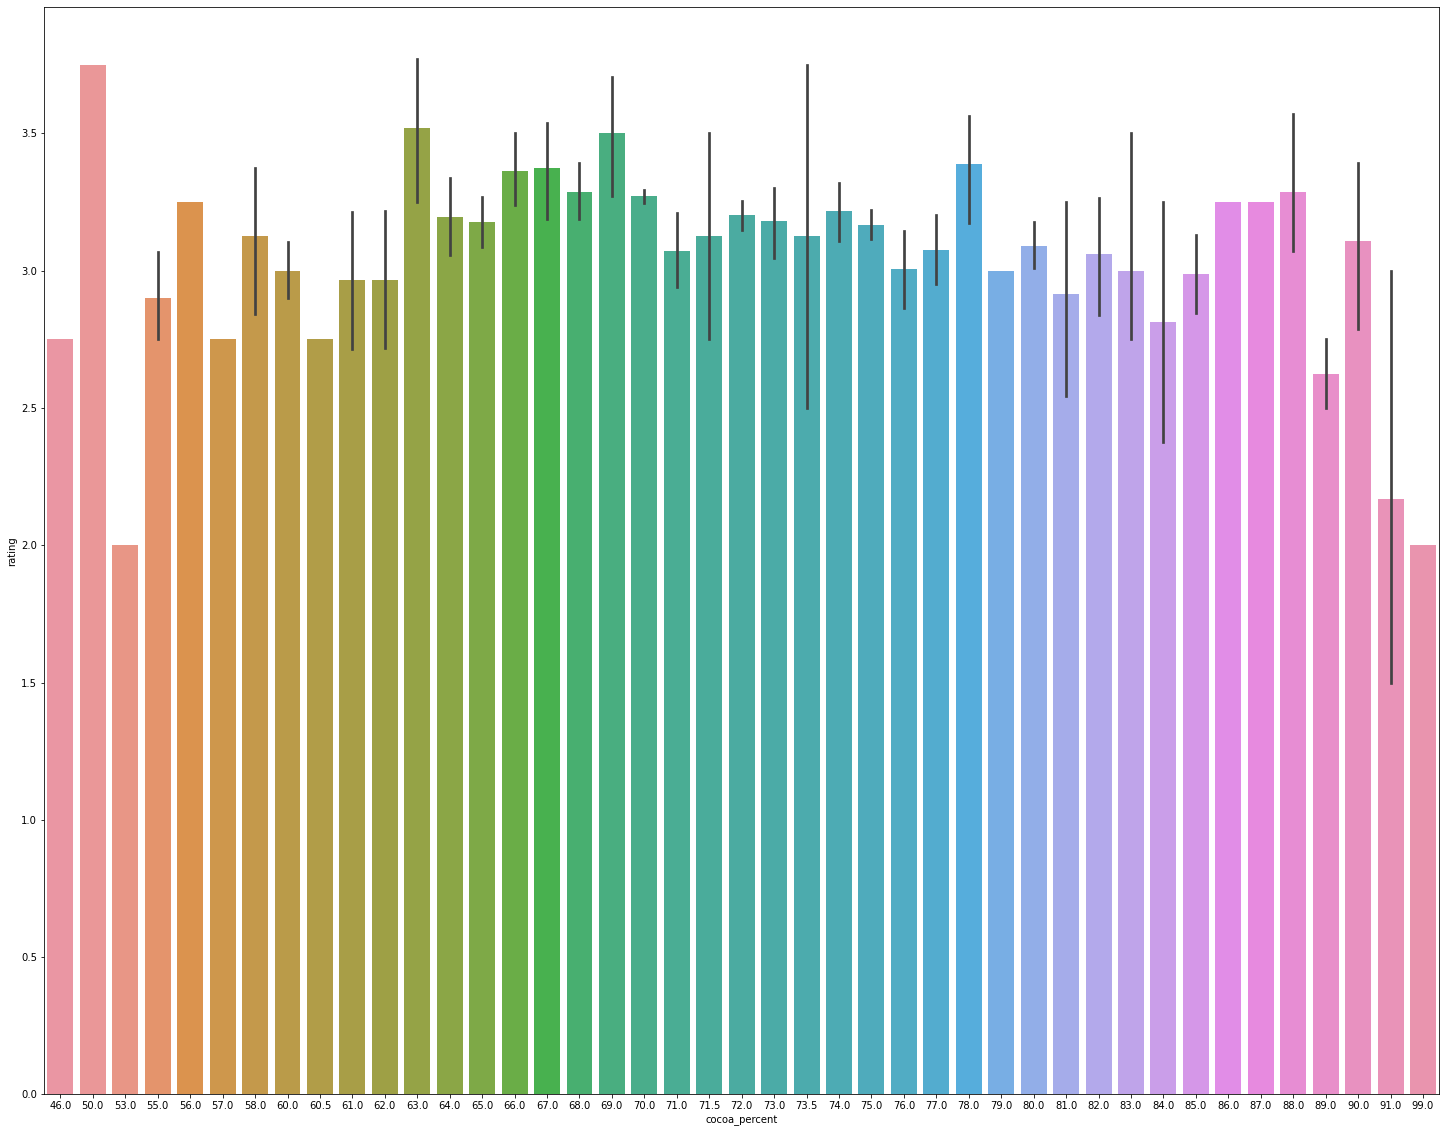

In [30]:
plt.figure (figsize= (25,20))
ax = sns.barplot(x=df.cocoa_percent, y=df.rating)

**this graph just shows  the relationship  between cocoa percent and the  ratings. When  the cocoa percent is  in the 70's range it the  bars are steady**

In [31]:
weighted_avgs

{0: 15.85365307037203, 1: 55.54863290004482}

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


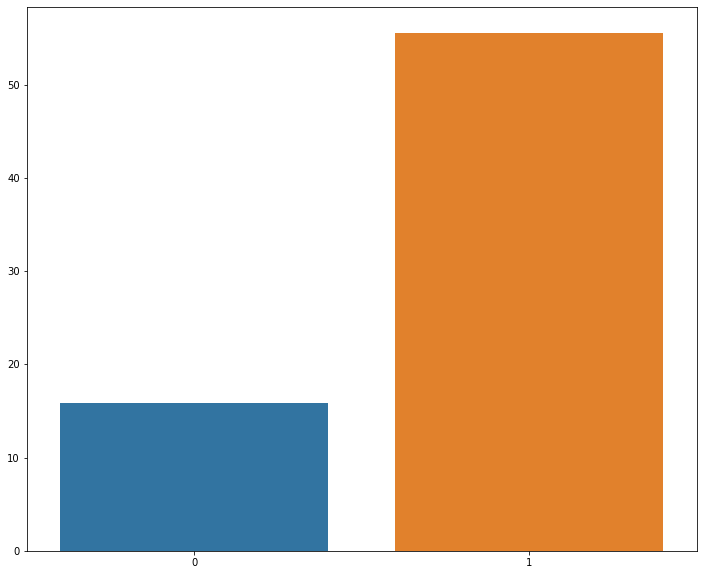

In [32]:
x = list(weighted_avgs.keys())
y = list(weighted_avgs.values())
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x, y, ax=ax)

**this graph shows the  relationnship between the rated class and the weighted averages in general. you can see  that the weighted average is higher when the rating is higher thann 3.**

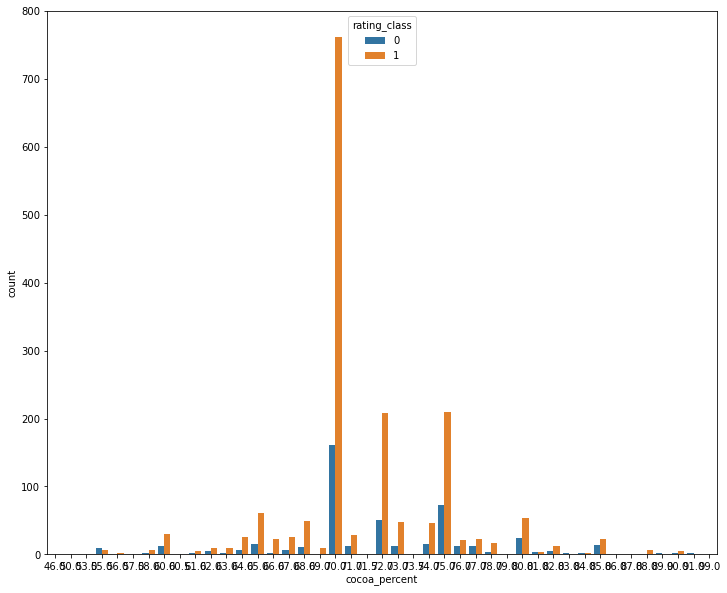

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(data=df, x='cocoa_percent', hue='rating_class', ax=ax)

**this graph is showing the relationship between cocoa percent and the rating class. Basically, it shows how many values of cocoa percent are in each ratinng class for each percent.**


In [34]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,ingredient_list,rating_class
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,"B,S,C",1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,"B,S,C",1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,"B,S,C",1
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,"B,S,C,L",1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,"B,S,C,L",1
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,"B,S*,C,Sa",0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,"B,S,C",1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50,"B,S,C",1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,"B,S,C",1


# Preprocessing

### Clarifying important predictor values (x) for the target value (y).

In [35]:
features = df.drop(['rating',  'ingredients', 'review_date', 'ref'], axis =1)
X = features
y = df.rating


### Splitting the data into three subsets of training and validation data for the future models.
    Two train test splits create three subsets of the original dataset which allows for the training data to not be bled into the test data - this reduced model's bias towards the pre-existing testing data, thus assuring maximum performance on future test sets which the model has never been exposed. 

In [36]:
#performing train test split for test set (subsets 1/3)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=42)


#performing a train test split for train and validation set (subsets - 3/3)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=42) 

In [37]:
#checking to ensure the shape of the columns and rows are still the same for the X and y values after the train test split.
X_tr.shape, y_tr.shape

((1896, 8), (1896,))

In [38]:
#ingredients have 88 rows that have no imputs.
X_train.isna().sum()

company_manufacturer                0
company_location                    0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
most_memorable_characteristics      0
ingredient_list                     0
rating_class                        0
dtype: int64

In [39]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,ingredient_list,rating_class
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,"B,S,C",1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,"B,S,C",1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,"B,S,C",1
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,"B,S,C,L",1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,"B,S,C,L",1
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,"B,S*,C,Sa",0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,"B,S,C",1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50,"B,S,C",1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,"B,S,C",1


#### Since there are no null values, we do not need to impute  or  one hot  encode most of the features. However, we need to one hot encode the ingredient list column in order to seperate each of  the individual lists into  their own column.

In [40]:
ohe  = OneHotEncoder()
ohe.fit(X_train[['ingredient_list']])

OneHotEncoder()

In [41]:
X_train_encoded = ohe.transform(X_train[['ingredient_list']])